In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import scipy.stats as stat
from matplotlib import pylab

In [2]:
df = pd.read_csv('NewData.csv')

In [3]:
df.head(3)

,com,sim_content,sin_comment,word_count,duplicate_word_ratio,no_of_sentences,length_of_comment,num_of_punctuations,is_period_sequence,stop_word_ratio,post_coment_gap,black_word_count,is_link,is_youtube_link,is_number,is_mail,comment_duplication,classifier_val
0,Ugx18OdhnjkAtm4_kvF4AaABAg,0.204106,0.272918,4,0.000000,1,19,0,0,0.0,86305.716667,1,0,0,0,0,0.0,0
1,Ugy3Fx_GQfOtmO9C2kF4AaABAg,0.261610,0.250529,15,0.000000,1,86,0,0,0.0,65233.033333,0,0,0,0,0,0.0,0
2,UgxCTzZDv-L9XYzGWEB4AaABAg,0.367243,0.363870,31,0.032258,1,167,0,0,0.0,63645.483333,4,0,0,0,0,0.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10635 entries, 0 to 10634
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   com                   10635 non-null  object 
 1   sim_content           10635 non-null  float64
 2   sin_comment           10635 non-null  float64
 3   word_count            10635 non-null  int64  
 4   duplicate_word_ratio  10635 non-null  float64
 5   no_of_sentences       10635 non-null  int64  
 6   length_of_comment     10635 non-null  int64  
 7   num_of_punctuations   10635 non-null  int64  
 8   is_period_sequence    10635 non-null  int64  
 9   stop_word_ratio       10635 non-null  float64
 10  post_coment_gap       10635 non-null  float64
 11  black_word_count      10635 non-null  int64  
 12  is_link               10635 non-null  int64  
 13  is_youtube_link       10635 non-null  int64  
 14  is_number             10635 non-null  int64  
 15  is_mail            

In [5]:
# all of features are in float and int data types and no missing values

<AxesSubplot:>

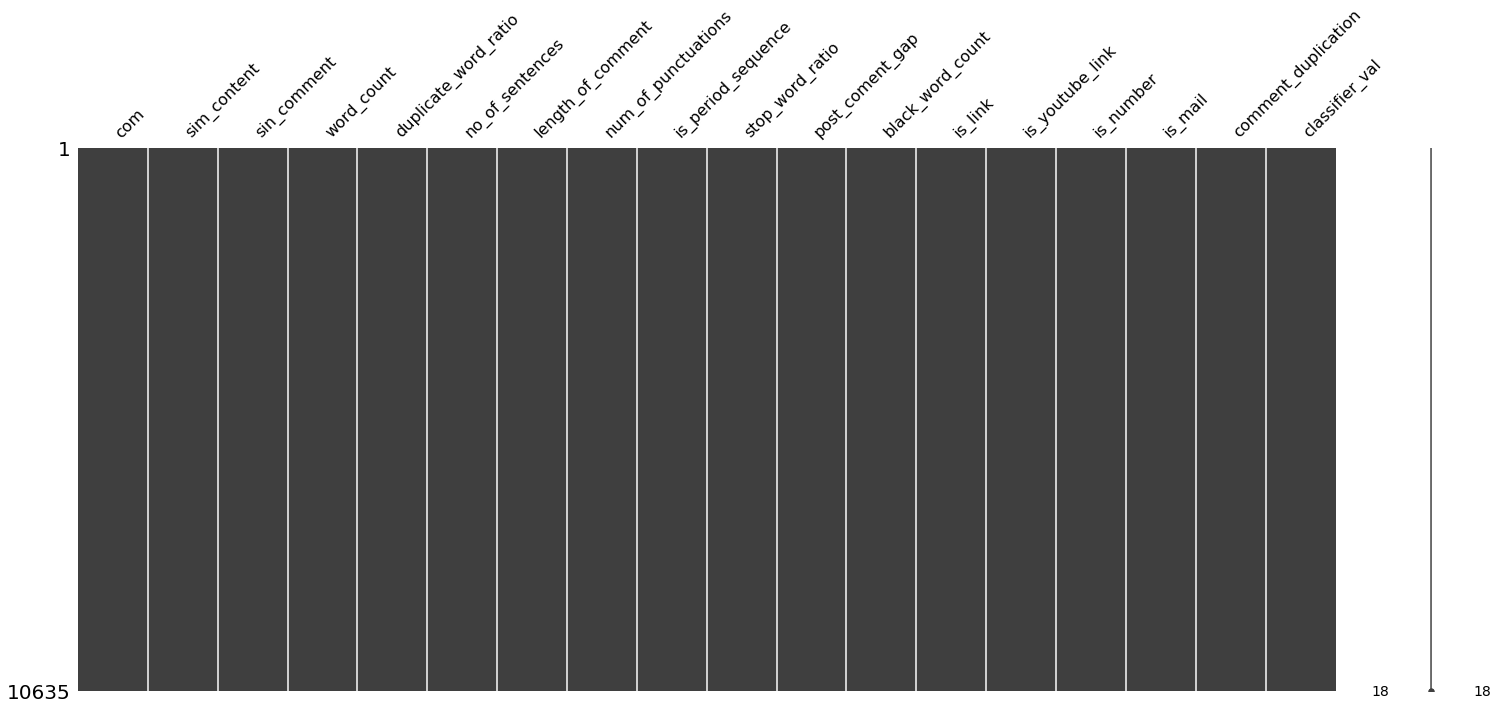

In [5]:
msn.matrix(df)

In [6]:
df.columns

Index(['com', 'sim_content', 'sin_comment', 'word_count',
       'duplicate_word_ratio', 'no_of_sentences', 'length_of_comment',
       'num_of_punctuations', 'is_period_sequence', 'stop_word_ratio',
       'post_coment_gap', 'black_word_count', 'is_link', 'is_youtube_link',
       'is_number', 'is_mail', 'comment_duplication', 'classifier_val'],
      dtype='object')

In [7]:
df1 = df[['sim_content', 'sin_comment', 'word_count',
       'duplicate_word_ratio', 'no_of_sentences', 'length_of_comment',
       'num_of_punctuations', 'is_period_sequence', 'stop_word_ratio',
       'post_coment_gap', 'black_word_count', 'is_link', 'is_youtube_link',
       'is_number', 'is_mail', 'comment_duplication', 'classifier_val']]

In [8]:
continous_features = [x for x in df1.columns if df1[x].dtype == 'float64']

In [9]:
continous_features

['sim_content',
 'sin_comment',
 'duplicate_word_ratio',
 'stop_word_ratio',
 'post_coment_gap',
 'comment_duplication']

In [10]:
discreate_features = [x for x in df.columns if x not in continous_features if x not in ['classifier_val','com'] ]

In [11]:
discreate_features

['word_count',
 'no_of_sentences',
 'length_of_comment',
 'num_of_punctuations',
 'is_period_sequence',
 'black_word_count',
 'is_link',
 'is_youtube_link',
 'is_number',
 'is_mail']

### Handle Outliers

In [26]:
df2 = df.copy()

In [13]:
# 'sim_content'

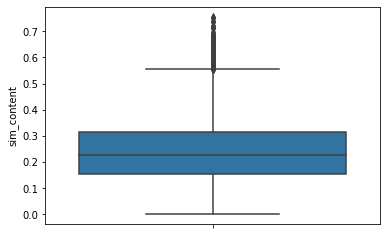

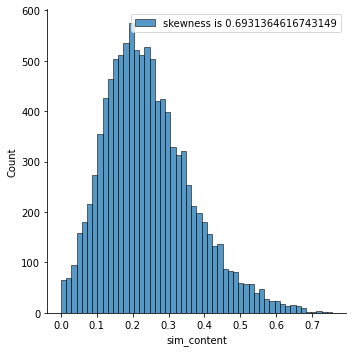

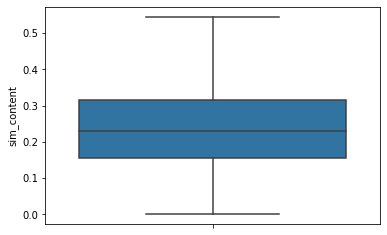

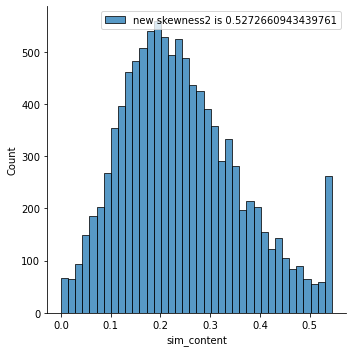

In [27]:
sns.boxplot(y=df2['sim_content'])
plt.show()
sns.displot( data=df2['sim_content'],label="skewness is {}".format(df2['sim_content'].skew()))
plt.legend(loc='best')
plt.show()


#x = df2['sim_content'].quantile(0.1)
y = df2['sim_content'].quantile(0.98)
#df2['sim_content']= np.where(df2['sim_content'] < x,  x,df2['sim_content'])
df2['sim_content']= np.where(df2['sim_content'] > y,  y,df2['sim_content'])


sns.boxplot(y=df2['sim_content'])
plt.show()
sns.displot(data=df2['sim_content'],label="new skewness2 is {}".format(df2['sim_content'].skew()))
plt.legend(loc='best')
plt.show()

In [34]:
# 'sin_comment'
df3 = df2.copy()

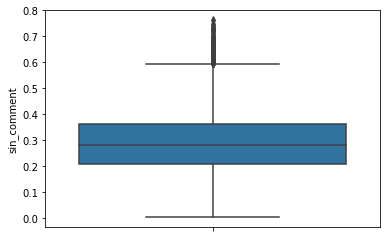

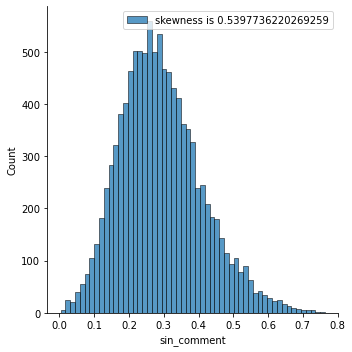

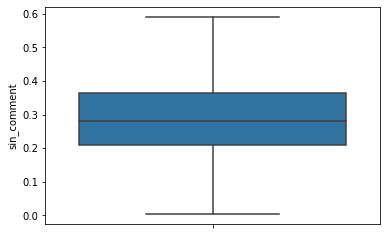

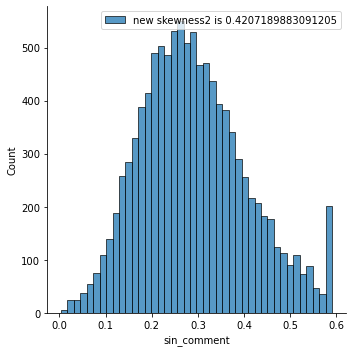

In [35]:
sns.boxplot(y=df3['sin_comment'])
plt.show()
sns.displot( data=df3['sin_comment'],label="skewness is {}".format(df3['sin_comment'].skew()))
plt.legend(loc='best')
plt.show()


#x = df3['sin_comment'].quantile(0.03)
y = df3['sin_comment'].quantile(0.985)
#df3['sin_comment']= np.where(df3['sin_comment'] < x,  x,df3['sin_comment'])
df3['sin_comment']= np.where(df3['sin_comment'] > y,  y,df3['sin_comment'])


sns.boxplot(y=df3['sin_comment'])
plt.show()
sns.displot(data=df3['sin_comment'],label="new skewness2 is {}".format(df3['sin_comment'].skew()))
plt.legend(loc='best')
plt.show()

In [38]:
# 'word_count'
df4 = df3.copy()

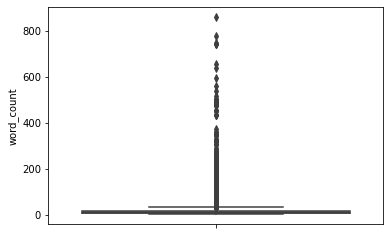

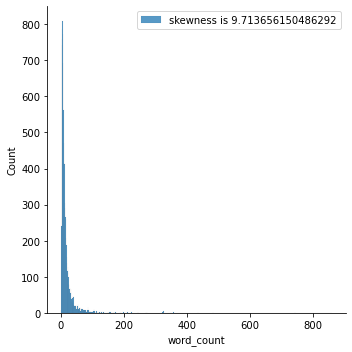

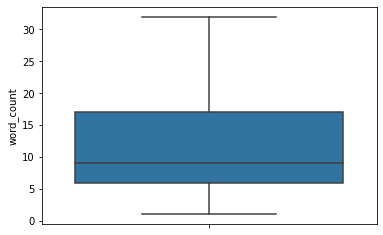

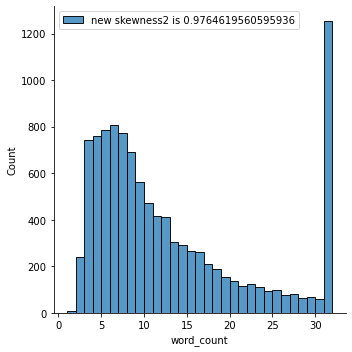

In [39]:
sns.boxplot(y=df4['word_count'])
plt.show()
sns.displot( data=df4['word_count'],label="skewness is {}".format(df4['word_count'].skew()))
plt.legend(loc='best')
plt.show()


#x = df2['word_count'].quantile(0.1)
y = df4['word_count'].quantile(0.89)
#df2['word_count']= np.where(df2['word_count'] < x,  x,df2['word_count'])
df4['word_count']= np.where(df4['word_count'] > y,  y,df4['word_count'])


sns.boxplot(y=df4['word_count'])
plt.show()
sns.displot(data=df4['word_count'],label="new skewness2 is {}".format(df4['word_count'].skew()))
plt.legend(loc='best')
plt.show()

In [48]:
# 'duplicate_word_ratio'
df5 = df4.copy()

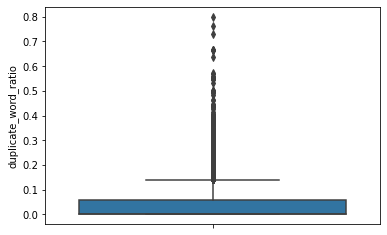

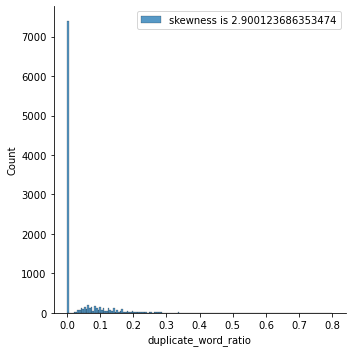

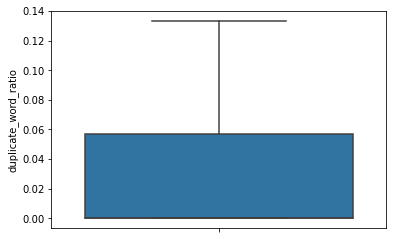

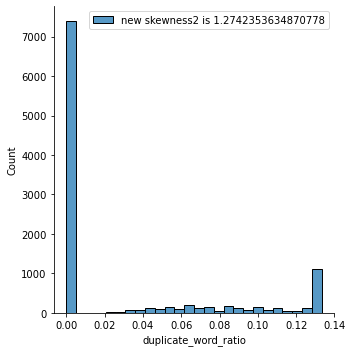

In [49]:
sns.boxplot(y=df5['duplicate_word_ratio'])
plt.show()
sns.displot( data=df5['duplicate_word_ratio'],label="skewness is {}".format(df5['duplicate_word_ratio'].skew()))
plt.legend(loc='best')
plt.show()


#x = df2['duplicate_word_ratio'].quantile(0.1)
y = df5['duplicate_word_ratio'].quantile(0.9)
#df2['duplicate_word_ratiot']= np.where(df2['duplicate_word_ratio'] < x,  x,df2['duplicate_word_ratio'])
df5['duplicate_word_ratio']= np.where(df5['duplicate_word_ratio'] > y,  y,df5['duplicate_word_ratio'])


sns.boxplot(y=df5['duplicate_word_ratio'])
plt.show()
sns.displot(data=df5['duplicate_word_ratio'],label="new skewness2 is {}".format(df5['duplicate_word_ratio'].skew()))
plt.legend(loc='best')
plt.show()

In [50]:
# 'no_of_sentences'
df6 = df5.copy()

In [51]:
df6['no_of_sentences'].value_counts()

1     7530
2     1208
3      628
4      370
5      254
6      147
7       93
8       85
9       43
10      42
11      38
12      31
13      25
15      13
18      12
14      12
20      11
16      10
19       9
17       7
23       6
31       5
70       4
22       4
24       4
28       4
21       3
30       3
39       3
36       3
74       3
38       2
25       2
29       2
73       2
27       2
44       1
33       1
41       1
49       1
66       1
46       1
96       1
90       1
68       1
40       1
93       1
61       1
59       1
72       1
47       1
Name: no_of_sentences, dtype: int64

In [52]:
df6['no_of_sentences'] = np.where(df6['no_of_sentences']>4,4,df6['no_of_sentences'])

In [53]:
df6['no_of_sentences'].value_counts()

1    7530
4    1269
2    1208
3     628
Name: no_of_sentences, dtype: int64

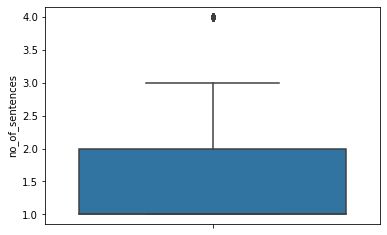

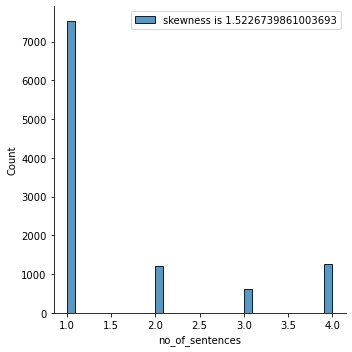

In [54]:
sns.boxplot(y=df6['no_of_sentences'])
plt.show()
sns.displot( data=df6['no_of_sentences'],label="skewness is {}".format(df6['no_of_sentences'].skew()))
plt.legend(loc='best')
plt.show()


#x = df6['no_of_sentences'].quantile(0.1)
#y = df6['no_of_sentences'].quantile(0.7)
#df6['no_of_sentences']= np.where(df6['no_of_sentences'] < x,  x,df6['no_of_sentences'])
#df6['no_of_sentences']= np.where(df6['no_of_sentences'] > y,  y,df6['no_of_sentences'])


#sns.boxplot(y=df6['no_of_sentences'])
#plt.show()
#sns.displot(data=df6['no_of_sentences'],label="new skewness2 is {}".format(df6['no_of_sentences'].skew()))
#plt.legend(loc='best')
#plt.show()

In [63]:
# 'length_of_comment'
df7 = df6.copy()

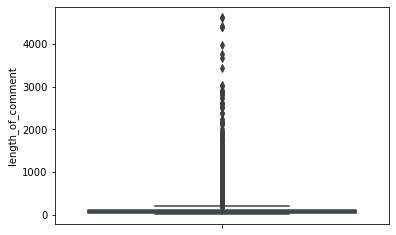

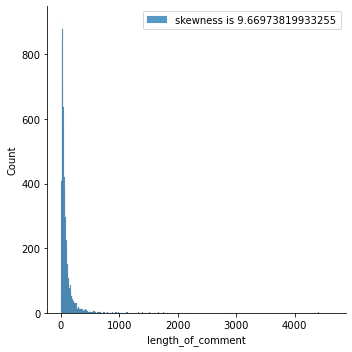

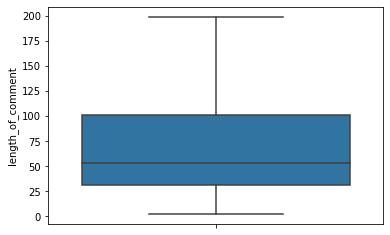

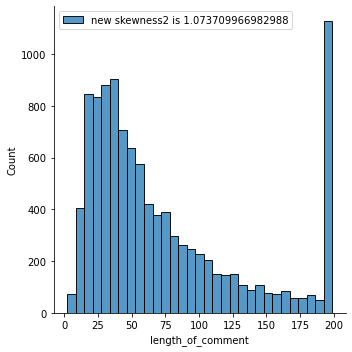

In [64]:
sns.boxplot(y=df7['length_of_comment'])
plt.show()
sns.displot( data=df7['length_of_comment'],label="skewness is {}".format(df7['length_of_comment'].skew()))
plt.legend(loc='best')
plt.show()


#x = df7['length_of_comment'].quantile(0.1)
y = df7['length_of_comment'].quantile(0.9)
#df7['length_of_comment']= np.where(df7['length_of_comment'] < x,  x,df7['length_of_comment'])
df7['length_of_comment']= np.where(df7['length_of_comment'] > y,  y,df7['length_of_comment'])


sns.boxplot(y=df7['length_of_comment'])
plt.show()
sns.displot(data=df7['length_of_comment'],label="new skewness2 is {}".format(df7['length_of_comment'].skew()))
plt.legend(loc='best')
plt.show()

In [69]:
# 'num_of_punctuations'
df8 = df7.copy()

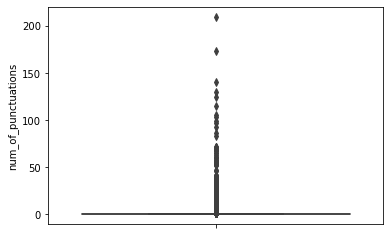

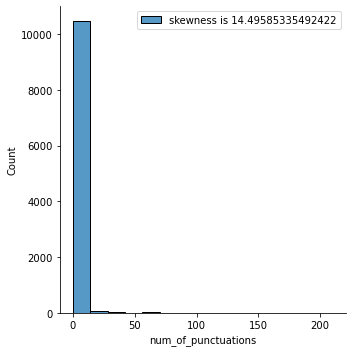

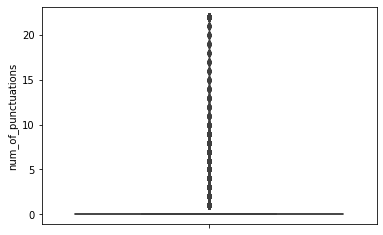

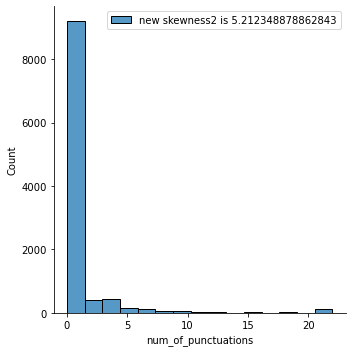

In [70]:
sns.boxplot(y=df8['num_of_punctuations'])
plt.show()
sns.displot( data=df8['num_of_punctuations'],label="skewness is {}".format(df8['num_of_punctuations'].skew()))
plt.legend(loc='best')
plt.show()


#x = df8['num_of_punctuations'].quantile(0.1)
y = df8['num_of_punctuations'].quantile(0.99)
#df8['num_of_punctuations']= np.where(df8['num_of_punctuationst'] < x,  x,df8['num_of_punctuations'])
df8['num_of_punctuations']= np.where(df8['num_of_punctuations'] > y,  y,df8['num_of_punctuations'])


sns.boxplot(y=df8['num_of_punctuations'])
plt.show()
sns.displot(data=df8['num_of_punctuations'],label="new skewness2 is {}".format(df8['num_of_punctuations'].skew()))
plt.legend(loc='best')
plt.show()

In [75]:
# 'stop_word_ratio'
df9 = df8.copy()

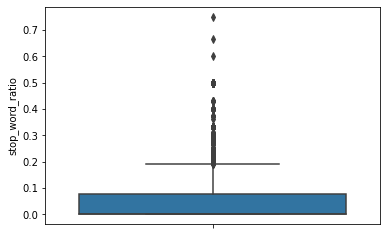

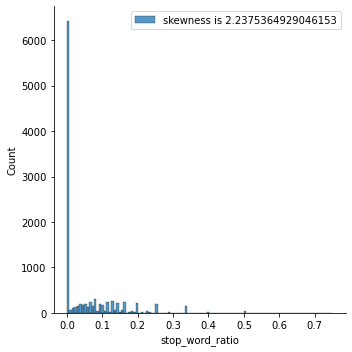

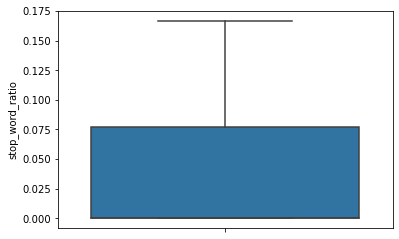

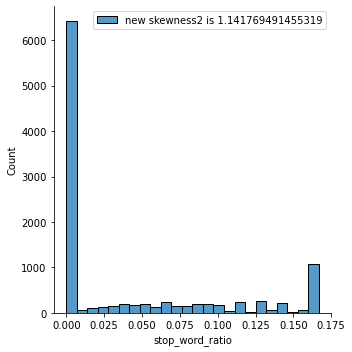

In [76]:
sns.boxplot(y=df9['stop_word_ratio'])
plt.show()
sns.displot( data=df9['stop_word_ratio'],label="skewness is {}".format(df9['stop_word_ratio'].skew()))
plt.legend(loc='best')
plt.show()


#x = df9['stop_word_ratio'].quantile(0.1)
y = df9['stop_word_ratio'].quantile(0.92)
#df9['stop_word_ratio']= np.where(df9['stop_word_ratio'] < x,  x,df9['stop_word_ratio'])
df9['stop_word_ratio']= np.where(df9['stop_word_ratio'] > y,  y,df9['stop_word_ratio'])


sns.boxplot(y=df9['stop_word_ratio'])
plt.show()
sns.displot(data=df9['stop_word_ratio'],label="new skewness2 is {}".format(df9['stop_word_ratio'].skew()))
plt.legend(loc='best')
plt.show()

In [87]:
# 'post_coment_gap'
df10 = df9.copy()

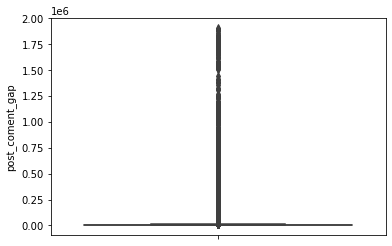

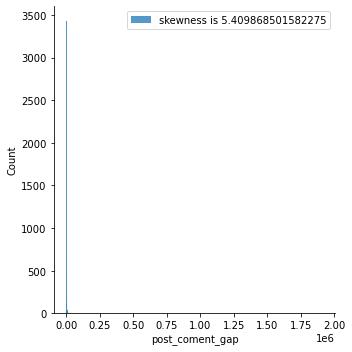

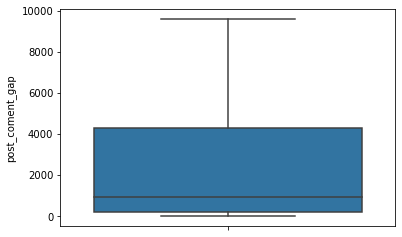

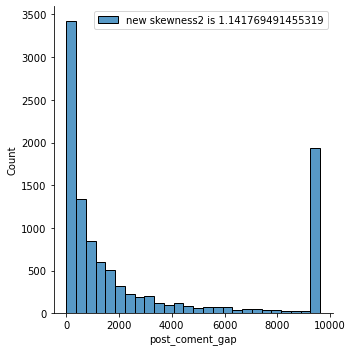

In [88]:
sns.boxplot(y=df10['post_coment_gap'])
plt.show()
sns.displot( data=df10['post_coment_gap'],label="skewness is {}".format(df10['post_coment_gap'].skew()))
plt.legend(loc='best')
plt.show()


#x = df10['post_coment_gap'].quantile(0.1)
y = df10['post_coment_gap'].quantile(0.82)
#df10['post_coment_gap']= np.where(df10['post_coment_gap'] < x,  x,df10['post_coment_gap'])
df10['post_coment_gap']= np.where(df10['post_coment_gap'] > y,  y,df10['post_coment_gap'])


sns.boxplot(y=df10['post_coment_gap'])
plt.show()
sns.displot(data=df10['post_coment_gap'],label="new skewness2 is {}".format(df10['stop_word_ratio'].skew()))
plt.legend(loc='best')
plt.show()

In [95]:
# 'black_word_count'
df11 = df10.copy()

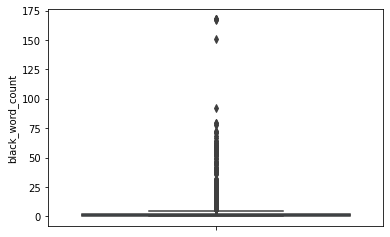

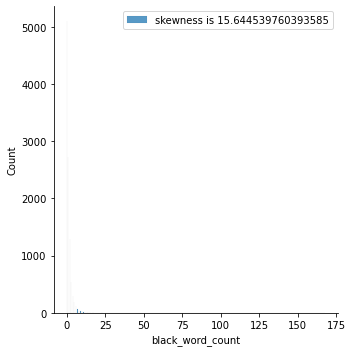

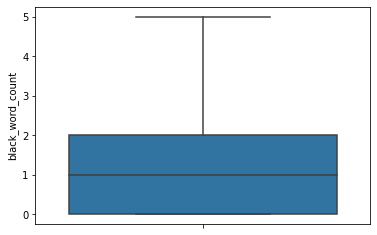

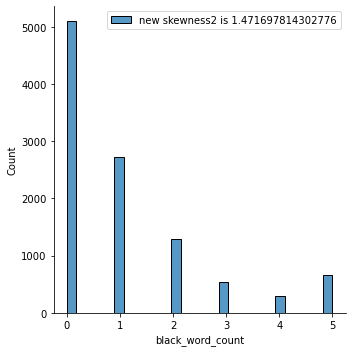

In [96]:
sns.boxplot(y=df11['black_word_count'])
plt.show()
sns.displot( data=df11['black_word_count'],label="skewness is {}".format(df11['black_word_count'].skew()))
plt.legend(loc='best')
plt.show()


#x = df10['post_coment_gap'].quantile(0.1)
y = df11['black_word_count'].quantile(0.95)
#df10['post_coment_gap']= np.where(df10['post_coment_gap'] < x,  x,df10['post_coment_gap'])
df11['black_word_count']= np.where(df11['black_word_count'] > y,  y,df11['black_word_count'])


sns.boxplot(y=df11['black_word_count'])
plt.show()
sns.displot(data=df11['black_word_count'],label="new skewness2 is {}".format(df11['black_word_count'].skew()))
plt.legend(loc='best')
plt.show()

In [37]:
# outliers handle in features 

In [38]:
#df1['num_of_punctuations'].value_counts().plot(kind='bar')

### find the realtionship between categoricl features and target variable

#### 'word_count' vs 'classifier_val'

In [97]:
pd.pivot_table(df11, index = ['classifier_val'], values = ['word_count'] ,aggfunc='mean') 

,word_count
classifier_val,
0,12.262435
1,19.129353


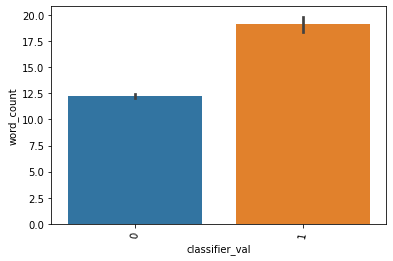

In [98]:
sns.barplot(data = df11,x='classifier_val', y ='word_count' )
plt.xticks(rotation=80)
plt.show()

In [128]:
#class_1 = df11.groupby('classifier_val').get_group(1)
#class_0 = df11.groupby('classifier_val').get_group(0)


<AxesSubplot:xlabel='word_count', ylabel='classifier_val'>

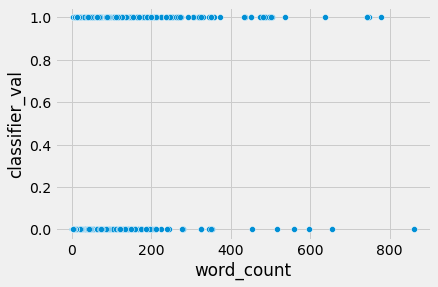

In [159]:
sns.scatterplot(data=df, x='word_count',y='classifier_val')

In [42]:
# we can see when increase the number of words, the probability of being a spam also going to high

#### 'no_of_sentences' vs 'classifier_val'

In [129]:
pd.pivot_table(data=df11, index=['classifier_val'], values=['no_of_sentences'], aggfunc='mean')

,no_of_sentences
classifier_val,
0,1.526193
1,2.365672


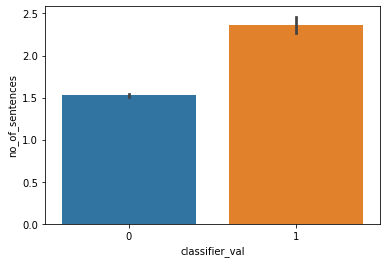

In [130]:
sns.barplot(data=df11, x='classifier_val',y='no_of_sentences')
plt.show()

<AxesSubplot:xlabel='no_of_sentences', ylabel='classifier_val'>

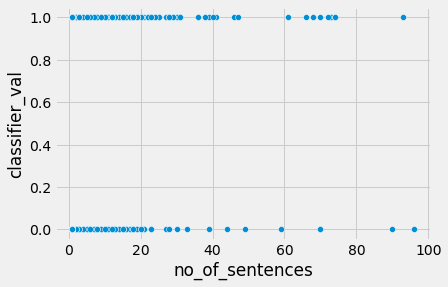

In [160]:
sns.scatterplot(data=df, x='no_of_sentences',y='classifier_val')

In [46]:
# we can see when increase the number of sentences ,probabiliy of being a spam also going to high

#### 'length_of_comment' vs 'classifier_val'

In [131]:
pd.pivot_table(data=df11, index=['classifier_val'], values=['length_of_comment'], aggfunc='mean')

,length_of_comment
classifier_val,
0,70.860747
1,117.366915


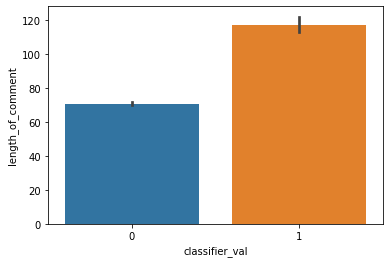

In [132]:
sns.barplot(data=df11, x='classifier_val', y='length_of_comment')
plt.show()

<AxesSubplot:xlabel='length_of_comment', ylabel='classifier_val'>

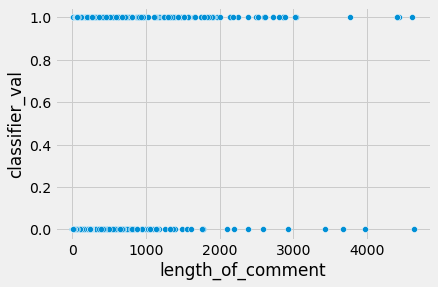

In [161]:
sns.scatterplot(data=df,x='length_of_comment',y='classifier_val')

In [50]:
# we can see when increase the length of a comment ,the probability of being a spam also going to high

#### 'num_of_punctuations' vs 'classifier_val'

In [133]:
pd.pivot_table(data=df11, index=['classifier_val'],values=['num_of_punctuations'],aggfunc='mean')

,num_of_punctuations
classifier_val,
0,0.518360
1,5.813433


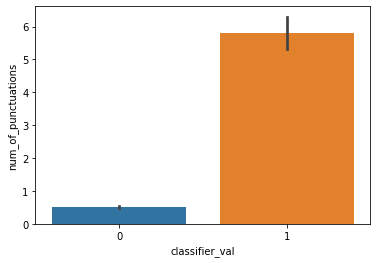

In [134]:
sns.barplot(data=df11, x='classifier_val',y='num_of_punctuations')
plt.show()

<AxesSubplot:xlabel='num_of_punctuations', ylabel='classifier_val'>

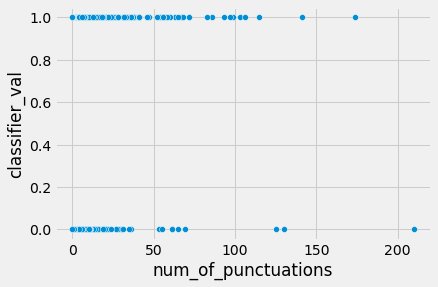

In [162]:
sns.scatterplot(data=df,x='num_of_punctuations',y='classifier_val')

In [54]:
# we can see when increase the number of punctuations ,the probability of being a spam also going to high

#### 'is_period_sequence' vs 'classifier_val'

In [135]:
pd.pivot_table(data=df11, index=['is_period_sequence','classifier_val'],values=['com'],aggfunc='count')

com
is_period_sequence classifier_val      
0                  0               7200
                   1                585
1                  0               2631
                   1                219

In [136]:
group_from_dots = df11.groupby(['is_period_sequence'])

#get a data frame with period_sequence value == 1
dfs_dots = group_from_dots.get_group(1)

dfs_dots['classifier_val'].value_counts()

0    2631
1     219
Name: classifier_val, dtype: int64

In [137]:
from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")
filt = (dfs_dots['classifier_val'] == 1)
spam = dfs_dots[filt]['is_period_sequence'].count()
filt = (dfs_dots['classifier_val'] == 0)
ham = dfs_dots[filt]['is_period_sequence'].count()

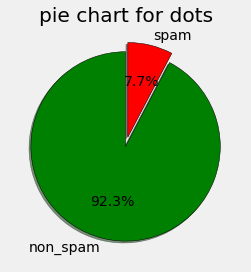

In [138]:
slices = [ham,spam]
labels = ['non_spam', 'spam']
colors = [ 'green','red',]
explode = [0,0.1]
plt.pie(slices, labels=labels, colors=colors, explode=explode, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.title("pie chart for dots")
#plt.savefig('dot_pie.png')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='is_period_sequence', ylabel='count'>

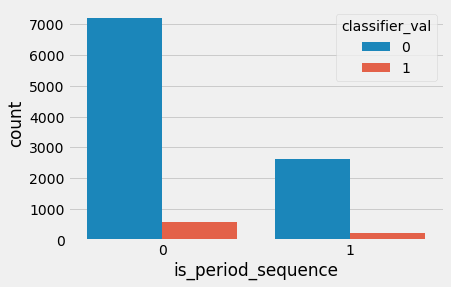

In [139]:
sns.countplot(x="is_period_sequence", data=df11,hue='classifier_val')

In [60]:
# we can see when a comment has a sequance of dots ..it has a high probabality for being a ham comment

#### 'black_word_count' vs 'classifier_val'

In [140]:
pd.pivot_table(data=df11, index=['classifier_val'],values=['black_word_count'],aggfunc='mean')

,black_word_count
classifier_val,
0,0.910589
1,3.139303


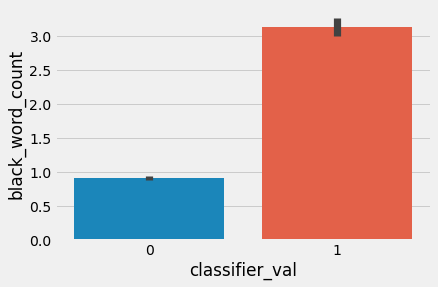

In [141]:
sns.barplot(data=df11, x='classifier_val',y='black_word_count')
plt.show()

<AxesSubplot:xlabel='black_word_count', ylabel='classifier_val'>

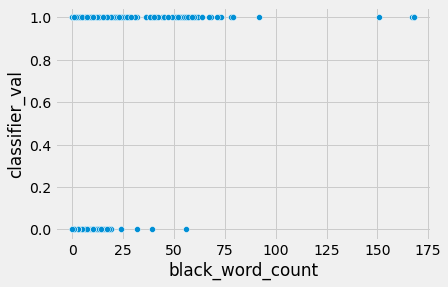

In [163]:
sns.scatterplot(data=df,x='black_word_count',y='classifier_val')

In [64]:
# we can see spam comments have a high number of black words counts

#### 'is_link' vs 'classifier_val'

In [142]:
pd.pivot_table(data=df11, index=['classifier_val','is_link'],values=['com'],aggfunc='count')

com
classifier_val is_link      
0              0        9786
               1          45
1              0         427
               1         377

<AxesSubplot:xlabel='is_link', ylabel='count'>

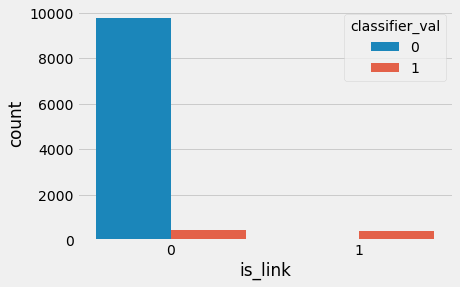

In [143]:
sns.countplot(x="is_link", data=df11,hue='classifier_val')

In [67]:
# if a comment has a link then it has a high probability for being a spam comment

#### 'is_youtube_link' vs 'classifier_val'

In [144]:
pd.pivot_table(data=df11, index=['classifier_val','is_youtube_link'],values=['com'],aggfunc='count')

com
classifier_val is_youtube_link      
0              0                9796
               1                  35
1              0                 599
               1                 205

<AxesSubplot:xlabel='is_youtube_link', ylabel='count'>

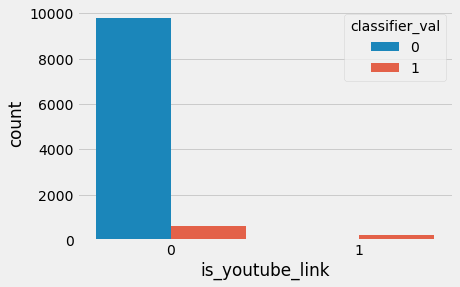

In [145]:
sns.countplot(x="is_youtube_link", data=df11,hue='classifier_val')

In [70]:
# if a comment has a youtube link it has a high probability for being a spam comments

In [146]:
pd.pivot_table(data=df11, index=['is_link','is_youtube_link'], values=['com',],columns=['classifier_val'],aggfunc='count',margins=True)

com            
classifier_val              0    1    All
is_link is_youtube_link                  
0       0                9786  427  10213
1       0                  10  172    182
        1                  35  205    240
All                      9831  804  10635

#### 'is_number' vs 'classifier_val'

In [147]:
pd.pivot_table(data=df11, index=['classifier_val','is_number'],values=['com'],aggfunc='count')

com
classifier_val is_number      
0              0          9822
               1             9
1              0           729
               1            75

<AxesSubplot:xlabel='is_number', ylabel='count'>

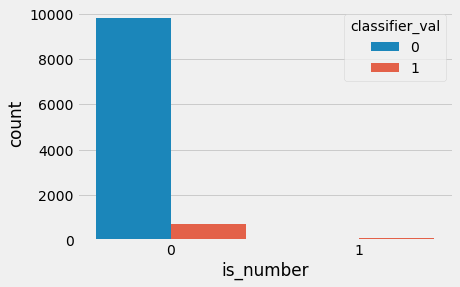

In [148]:
sns.countplot(x="is_number", data=df11,hue='classifier_val')

In [74]:
# we can see when a comment has a phone number information then it has a high probability for being a spam

#### 'is_mail' vs 'classifier_val'

In [149]:
pd.pivot_table(data=df11, index=['classifier_val','is_mail'],values=['com'],aggfunc='count')

,,com
classifier_val,is_mail,
0,0,9831
1,0,804


<AxesSubplot:xlabel='is_mail', ylabel='count'>

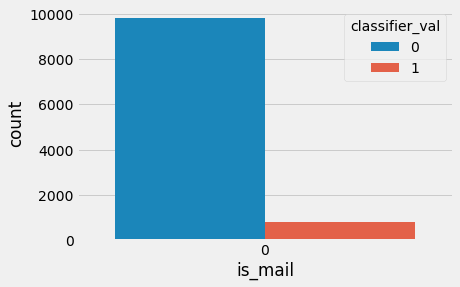

In [150]:
sns.countplot(x="is_mail", data=df11,hue='classifier_val')

In [77]:
# no mails in dataset 

In [151]:
df11.corr()

,sim_content,sin_comment,word_count,duplicate_word_ratio,no_of_sentences,length_of_comment,num_of_punctuations,is_period_sequence,stop_word_ratio,post_coment_gap,black_word_count,is_link,is_youtube_link,is_number,is_mail,comment_duplication,classifier_val
sim_content,1.000000,0.906824,0.773493,0.465317,0.528526,0.790287,0.251974,0.202425,0.046142,0.038554,0.497383,0.077733,-0.053702,0.112561,NaN,0.035974,0.054684
sin_comment,0.906824,1.000000,0.710402,0.439298,0.501808,0.729706,0.234282,0.203654,0.080322,0.029221,0.452498,0.060163,-0.068174,0.107390,NaN,0.049636,0.035843
word_count,0.773493,0.710402,1.000000,0.647366,0.695335,0.989821,0.391374,0.241961,0.045318,0.035312,0.615378,0.240810,0.105415,0.159298,NaN,0.087958,0.194824
duplicate_word_ratio,0.465317,0.439298,0.647366,1.000000,0.479033,0.636711,0.323942,0.172538,0.031162,0.044019,0.478506,0.163971,0.042632,0.140535,NaN,0.071415,0.162861
no_of_sentences,0.528526,0.501808,0.695335,0.479033,1.000000,0.703239,0.387435,0.398170,0.045006,0.042897,0.441973,0.271731,0.111988,0.169443,NaN,0.098073,0.213941
length_of_comment,0.790287,0.729706,0.989821,0.636711,0.703239,1.000000,0.408244,0.241330,0.033060,0.041808,0.608115,0.259084,0.116666,0.167254,NaN,0.100062,0.213069
num_of_punctuations,0.251974,0.234282,0.391374,0.323942,0.387435,0.408244,1.000000,0.092323,-0.038363,0.142430,0.419901,0.638000,0.321441,0.348949,NaN,0.183046,0.472685
is_period_sequence,0.202425,0.203654,0.241961,0.172538,0.398170,0.241330,0.092323,1.000000,0.022351,-0.012349,0.129980,0.031443,-0.010458,0.039546,NaN,-0.020360,0.002844
stop_word_ratio,0.046142,0.080322,0.045318,0.031162,0.045006,0.033060,-0.038363,0.022351,1.000000,-0.002014,-0.011399,-0.065866,-0.056906,-0.017618,NaN,-0.015484,-0.040563
post_coment_gap,0.038554,0.029221,0.035312,0.044019,0.042897,0.041808,0.142430,-0.012349,-0.002014,1.000000,0.074879,0.138769,0.023774,0.125202,NaN,0.015581,0.126414


### find the realtionship between continouse features and target variable

In [152]:
continous_features

['sim_content',
 'sin_comment',
 'duplicate_word_ratio',
 'stop_word_ratio',
 'post_coment_gap',
 'comment_duplication']

In [154]:
pd.pivot_table(df11, index = 'classifier_val', values = continous_features , aggfunc='mean' ,margins=True)

,comment_duplication,duplicate_word_ratio,post_coment_gap,sim_content,sin_comment,stop_word_ratio
classifier_val,,,,,,
0,0.010616,0.027033,2719.836108,0.240825,0.289982,0.041071
1,0.195443,0.056738,4435.056750,0.265370,0.305641,0.032007
All,0.024589,0.029279,2849.505821,0.242680,0.291166,0.040386


In [156]:
## sim_content

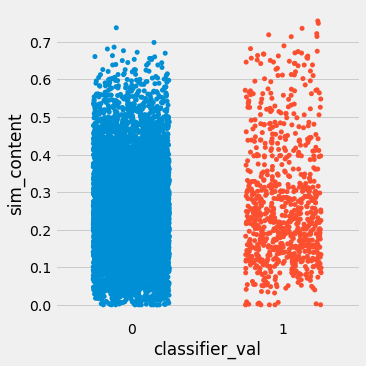

In [180]:
#sns.scatterplot(data=df, y='sim_content',x='classifier_val')
sns.catplot(data=df, y='sim_content',x='classifier_val',jitter=0.25)
#plt.xticks(rotation=80)

In [181]:
# we can see lot of spam comments have in range 0.1 - 0.34
# Ham comments have 0.04 - 0.5 
# therefor usually ham comments have a better cos similerity with it's content

In [182]:
# sin_comment

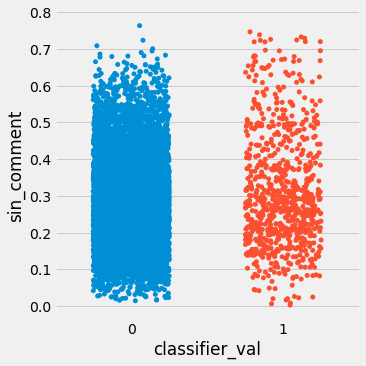

In [183]:
sns.catplot(data=df, y='sin_comment',x='classifier_val',jitter=0.25)

In [184]:
# we can see lot of spam comments have in range 0.15 - 0.32
# Ham comments have 0.04 - 0.55 
# therefor usually ham comments have a better cos similerity with it's sourounding comments

In [185]:
# stop_word_ratio

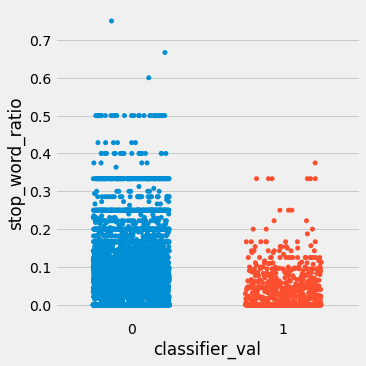

In [186]:
sns.catplot(data=df, y='stop_word_ratio',x='classifier_val',jitter=0.25)

In [187]:
# spam comments have a low number of stop words ratio

In [188]:
# post_coment_gap

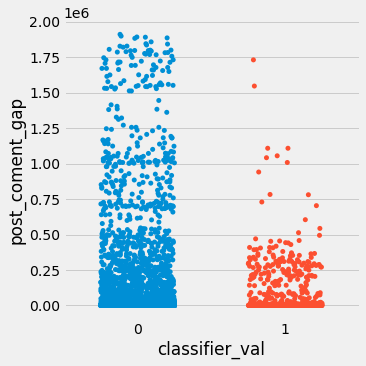

In [189]:
sns.catplot(data=df, y='post_coment_gap',x='classifier_val',jitter=0.25)

In [190]:
# we can see lot of spam comments have in range 0.001 - 0.01
# Ham comments have 0.001 - 0. 2
# we can conclude spam comments have a high probability of having a less time gap of (post - comment)

In [191]:
# duplicate_word_ratio

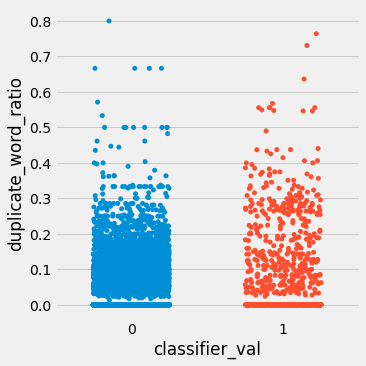

In [192]:
sns.catplot(data=df, y='duplicate_word_ratio',x='classifier_val',jitter=0.25)

In [194]:
# ham comments -> 0 - 0.2
# spam comments -> it has a several areas 0 to 0.01 , 0.05 to 0.15 , 0.28 to 0.3

In [195]:
# comment_duplication

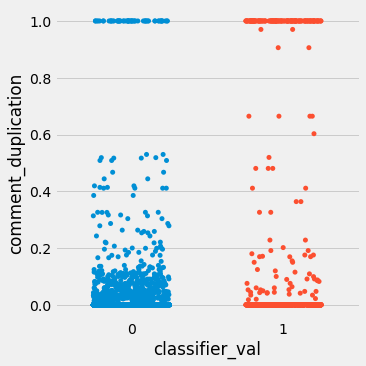

In [196]:
sns.catplot(data=df, y='comment_duplication',x='classifier_val',jitter=0.25)

In [216]:
x = df[df['comment_duplication']!=0]

In [217]:
from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")
filt = (x['classifier_val'] == 1)
spam = x[filt]['comment_duplication'].count()
filt = (x['classifier_val'] == 0)
ham = x[filt]['comment_duplication'].count()

In [220]:
ham

584

In [ ]:
# we can see spam comments have a much thickness of comment duplication at 1

### Feature correaltion

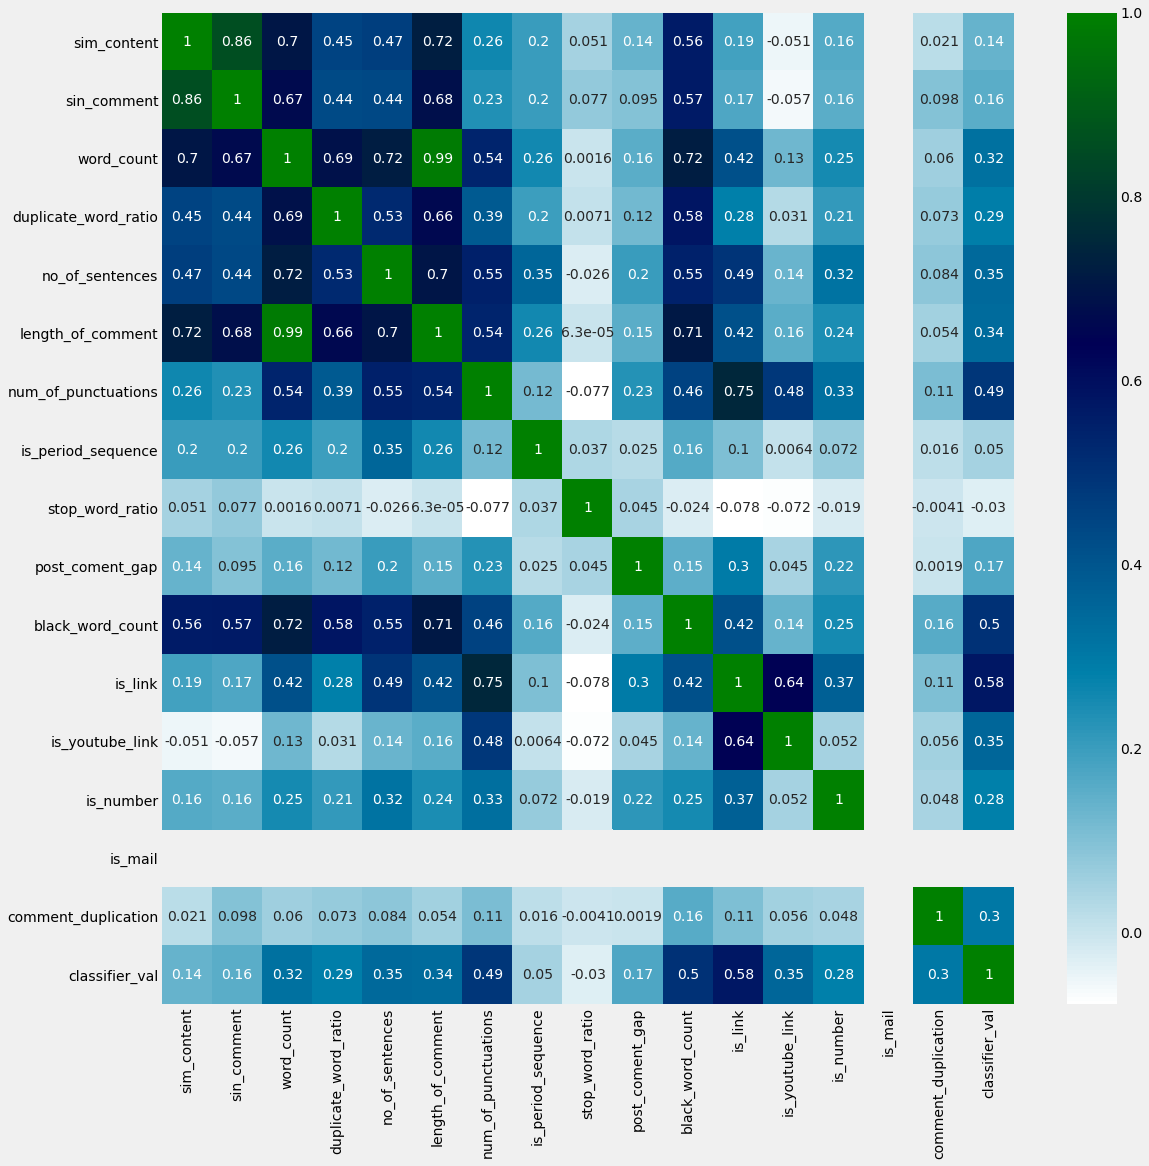

In [82]:
plt.figure(figsize=(17,17))
sns.heatmap(df11.corr(),annot=True,cmap='ocean_r')
plt.show()

### Data distribution

In [83]:
d_columns = [x for x in df11.columns if x!= 'com']

<Figure size 2880x2880 with 0 Axes>

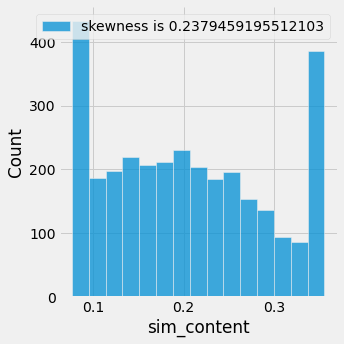

<Figure size 2880x2880 with 0 Axes>

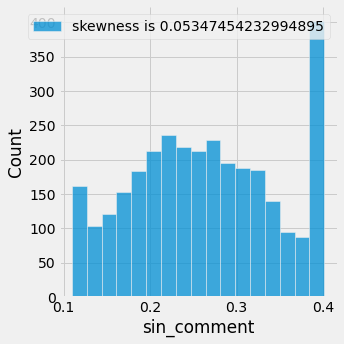

<Figure size 2880x2880 with 0 Axes>

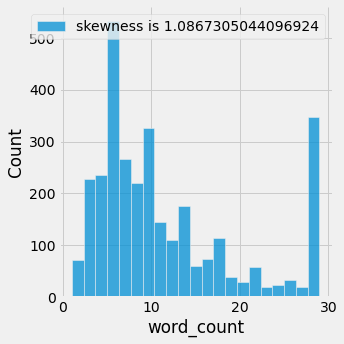

<Figure size 2880x2880 with 0 Axes>

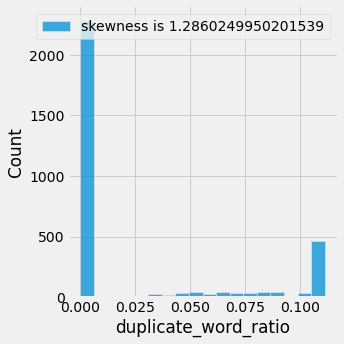

<Figure size 2880x2880 with 0 Axes>

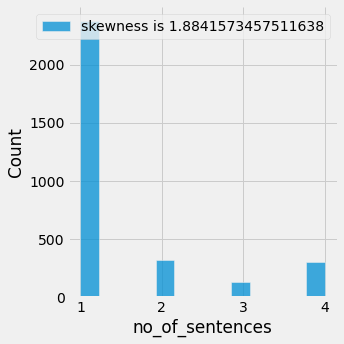

<Figure size 2880x2880 with 0 Axes>

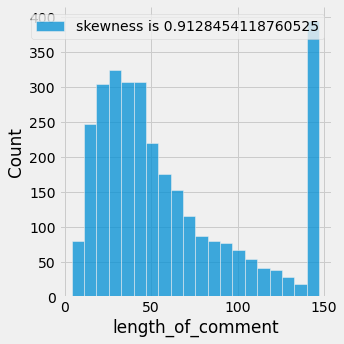

<Figure size 2880x2880 with 0 Axes>

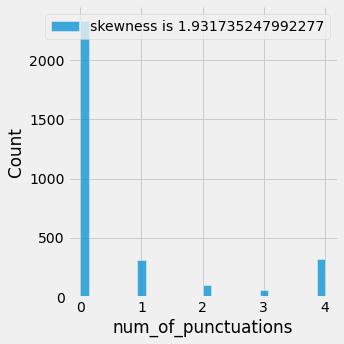

<Figure size 2880x2880 with 0 Axes>

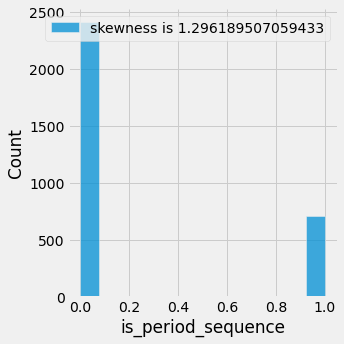

<Figure size 2880x2880 with 0 Axes>

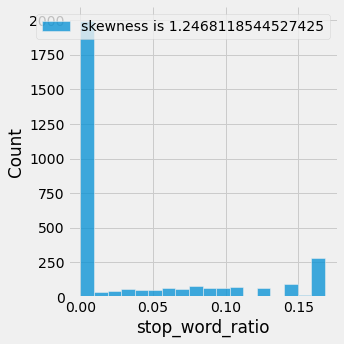

<Figure size 2880x2880 with 0 Axes>

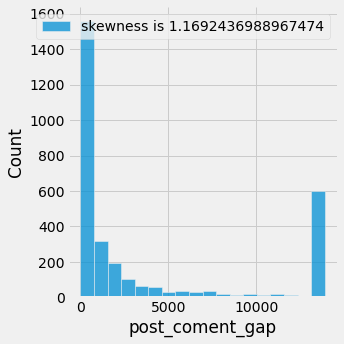

<Figure size 2880x2880 with 0 Axes>

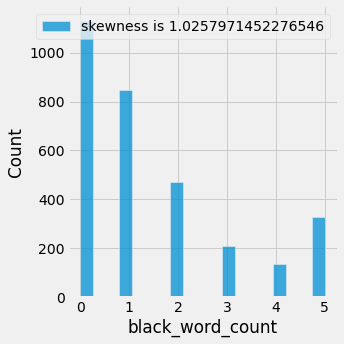

<Figure size 2880x2880 with 0 Axes>

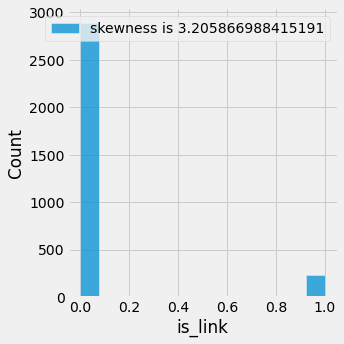

<Figure size 2880x2880 with 0 Axes>

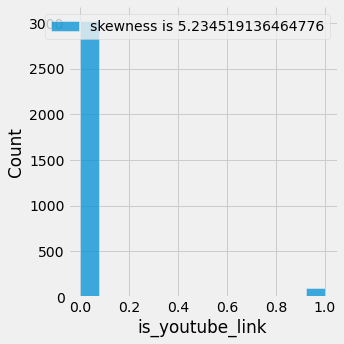

<Figure size 2880x2880 with 0 Axes>

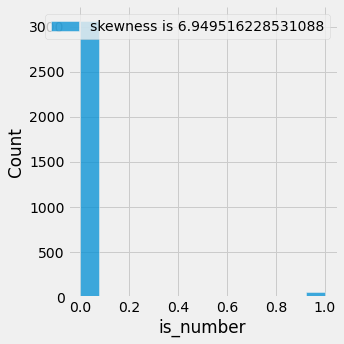

<Figure size 2880x2880 with 0 Axes>

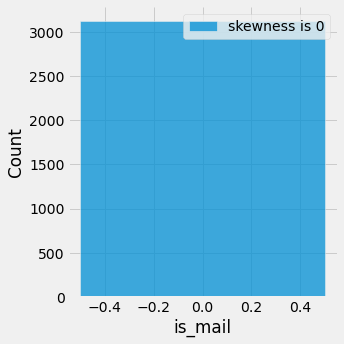

<Figure size 2880x2880 with 0 Axes>

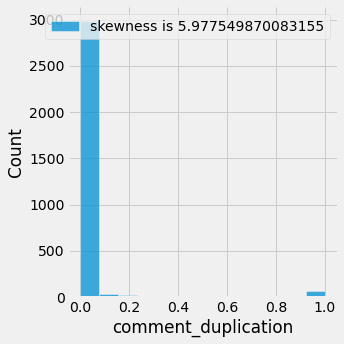

<Figure size 2880x2880 with 0 Axes>

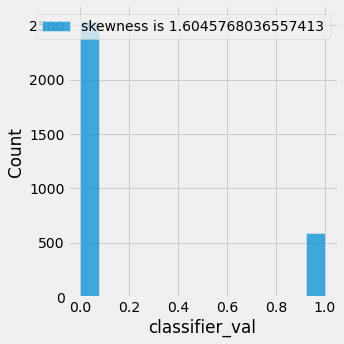

In [84]:
for x in d_columns:
    plt.figure(figsize=(40,40))
    sns.displot(df11[x],label="skewness is {}".format(df11[x].skew()),stat="count")
    plt.legend(loc='best')
    plt.show()

### Data transformation

Here we gonna use few trnformation techniques to find the best one for each features

1) Logarithmic transformation <br>
2) Reciprocal transformation <br>
3) Square root transformation <br>
4) Exponential transformation (more general, you can use any exponent) <br>
5) Boxcox transformation <br>

 

In [85]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    print("skewness is {}".format(df[feature].skew()))
    df[feature].hist()
    plt.title(feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()

In [86]:
# 'sim_content'
df12 = df11.copy()

skewness is -0.3907687872327979


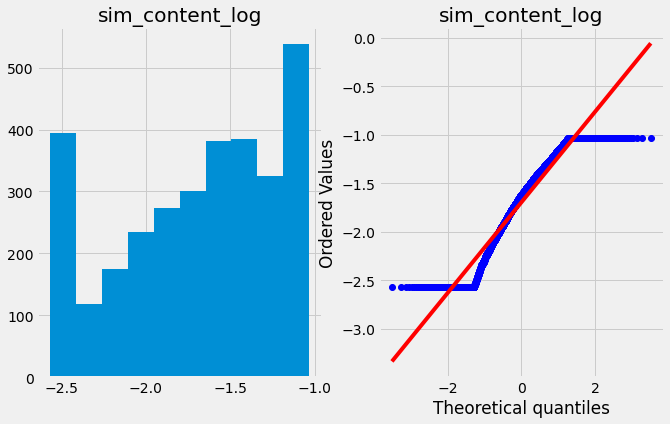

skewness is 1.0127586348345003


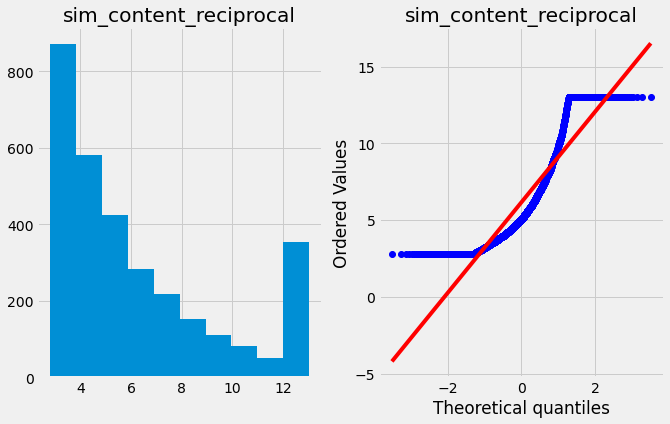

skewness is -0.06767815782132607


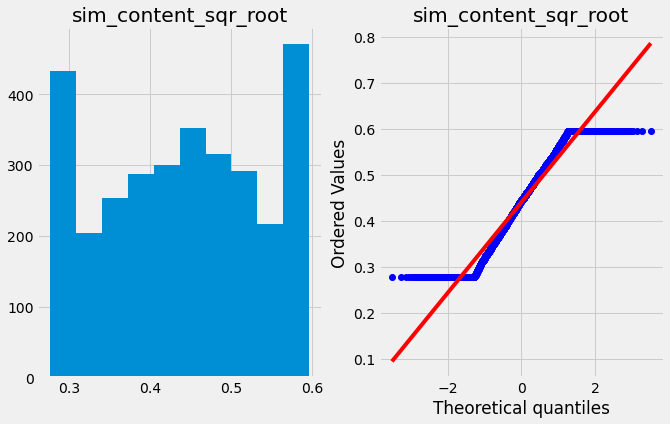

skewness is 0.7538140320564723


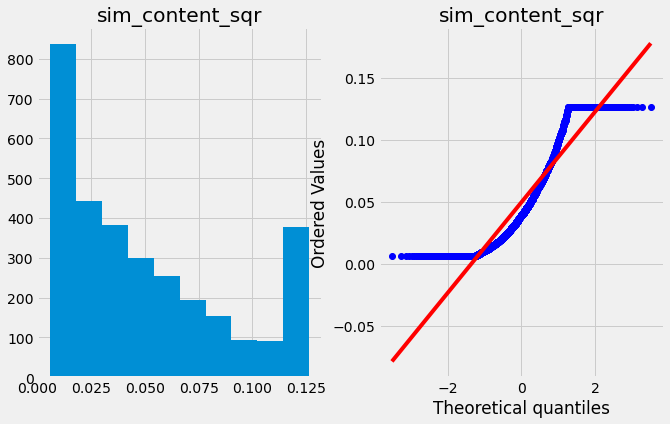

skewness is 0.13895237809120886


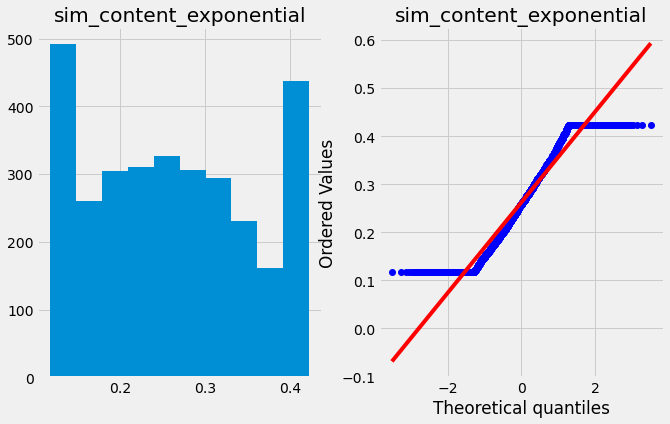

skewness is -0.08555096130894169


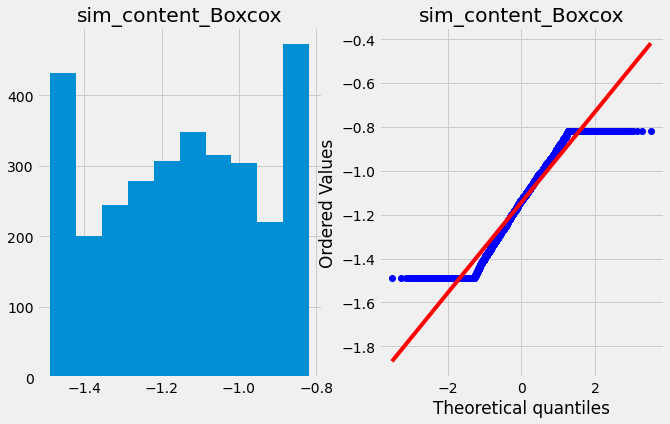

In [87]:
for i in ['sim_content']:
    df12[i+'_log']=np.log(df12[i])
    plot_data(df12,i+'_log')
    
    df12[i+'_reciprocal']=1/df12[i]
    plot_data(df12,i+'_reciprocal')
    
    df12[i+'_sqr_root']=df12[i]**(1/2)
    plot_data(df12,i+'_sqr_root')
    
    df12[i+'_sqr']=df12[i]**2
    plot_data(df12,i+'_sqr')
    
    df12[i+'_exponential']=df12[i]**(1/1.2)
    plot_data(df12,i+'_exponential')
    
    df12[i+'_Boxcox'],parameters=stat.boxcox(df12[i])
    plot_data(df12,i+'_Boxcox')

In [88]:
# sqr root transformation is better for sim_content
# we gonna add it to df11

skewness is -0.06767815782132607


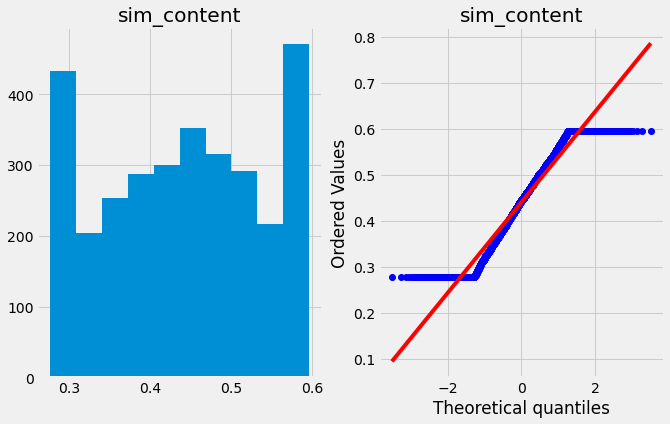

In [89]:
df11['sim_content']=df11['sim_content']**(1/2)
plot_data(df11,'sim_content')

In [90]:
# 'sin_comment'
df12 =df11.copy()

skewness is -0.5481822277628956


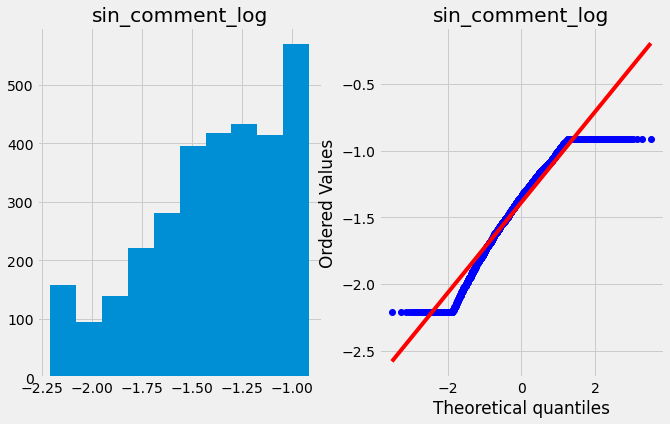

skewness is 1.2623923805099015


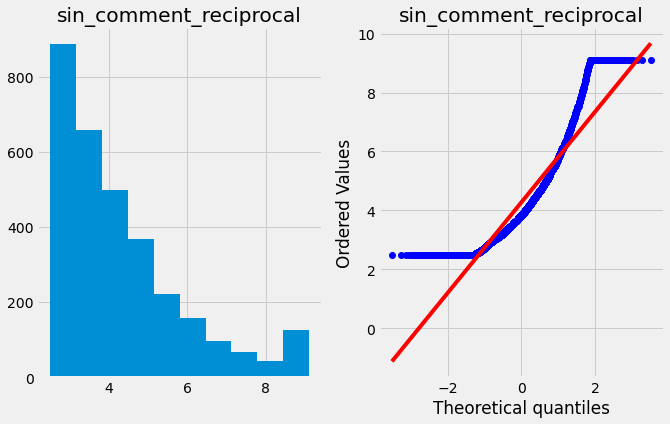

skewness is -0.23038583001835522


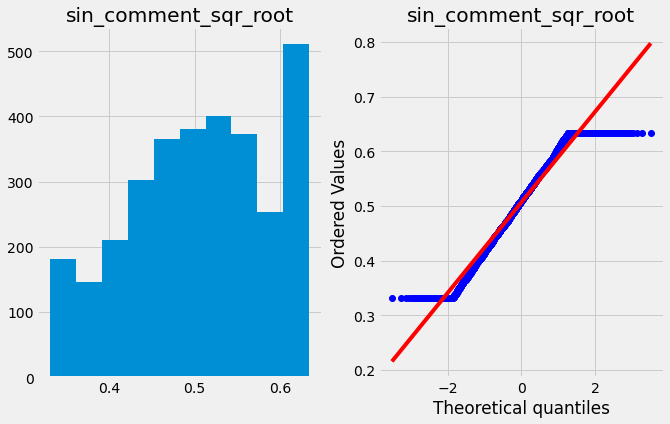

skewness is 0.5210308492718191


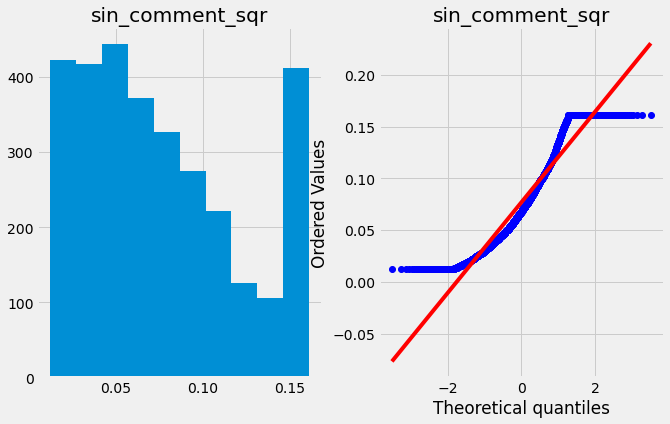

skewness is -0.03728919927368995


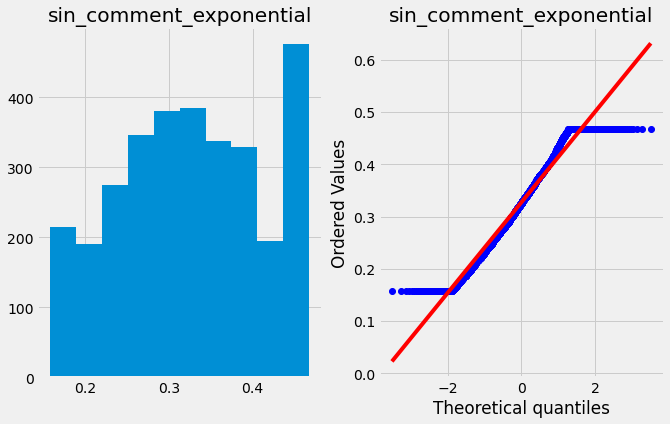

skewness is -0.07993819984297594


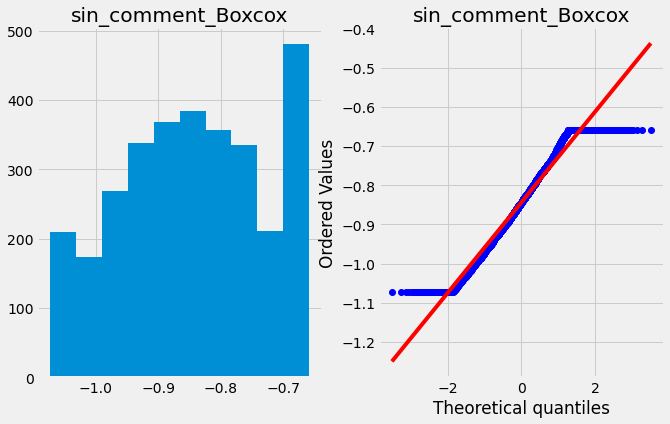

In [91]:
for i in ['sin_comment']:
    df12[i+'_log']=np.log(df12[i])
    plot_data(df12,i+'_log')
    
    df12[i+'_reciprocal']=1/df12[i]
    plot_data(df12,i+'_reciprocal')
    
    df12[i+'_sqr_root']=df12[i]**(1/2)
    plot_data(df12,i+'_sqr_root')
    
    df12[i+'_sqr']=df12[i]**2
    plot_data(df12,i+'_sqr')
    
    df12[i+'_exponential']=df12[i]**(1/1.2)
    plot_data(df12,i+'_exponential')
    
    df12[i+'_Boxcox'],parameters=stat.boxcox(df12[i])
    plot_data(df12,i+'_Boxcox')

In [92]:
# exponential transformation is better for sin_comment
# we gonna add it to df11

skewness is -0.03728919927368995


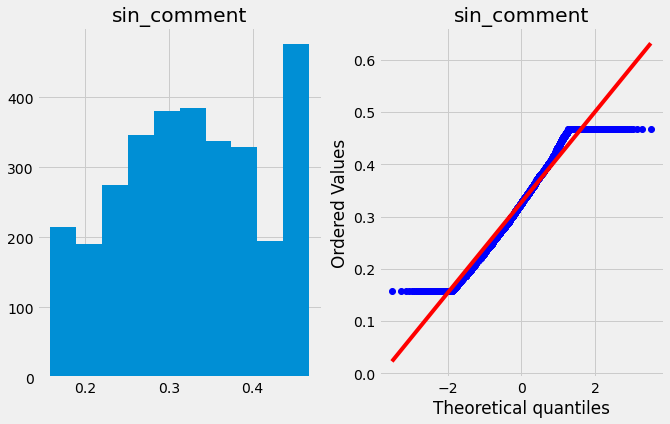

In [93]:
df11['sin_comment']=df11['sin_comment']**(1/1.2)
plot_data(df11,'sin_comment')

In [94]:
# 'word_count'
df12 = df11.copy()

skewness is 0.037254175116606815


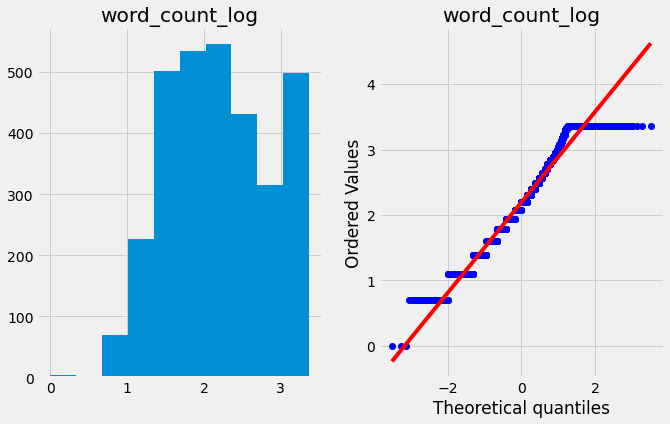

skewness is 1.8274028967968368


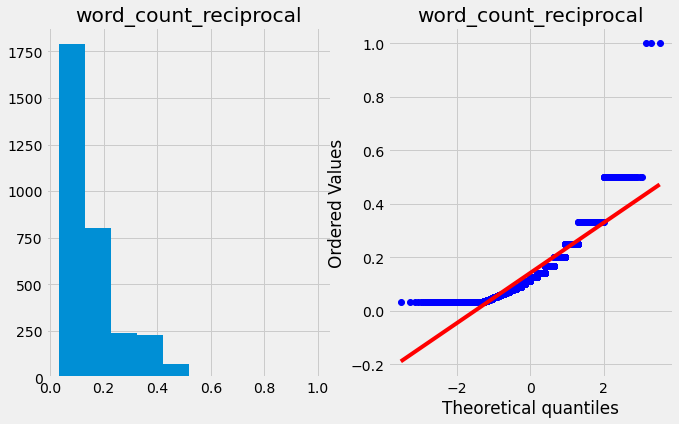

skewness is 0.6338012849689105


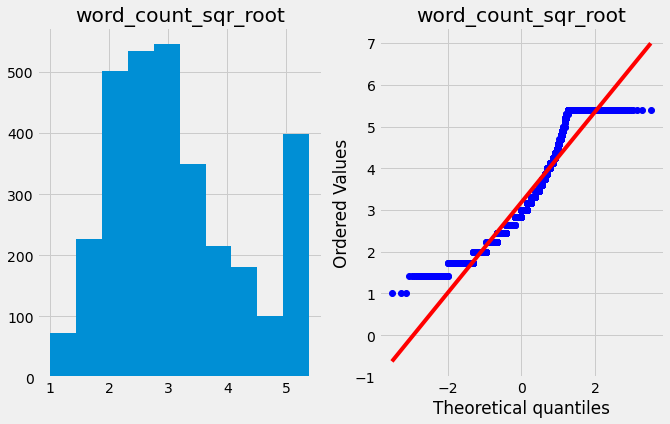

skewness is 1.6562429026280914


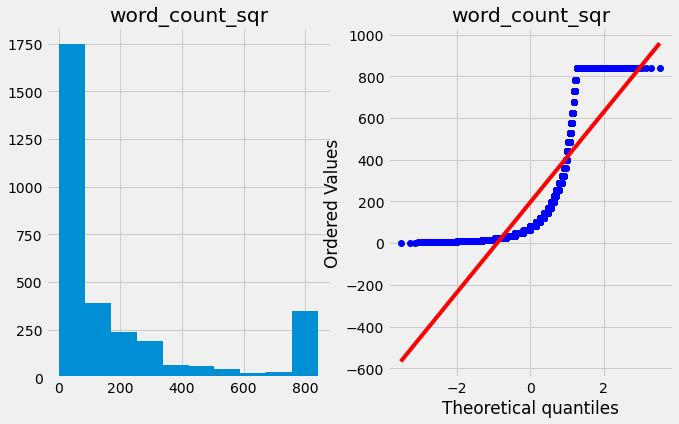

skewness is 0.9505044444369563


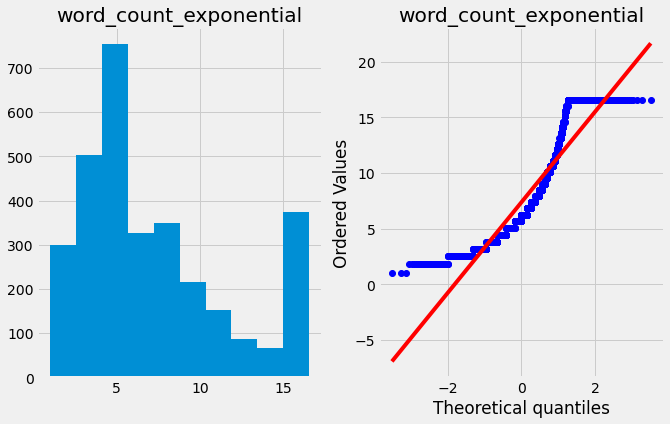

skewness is 0.00404309969194196


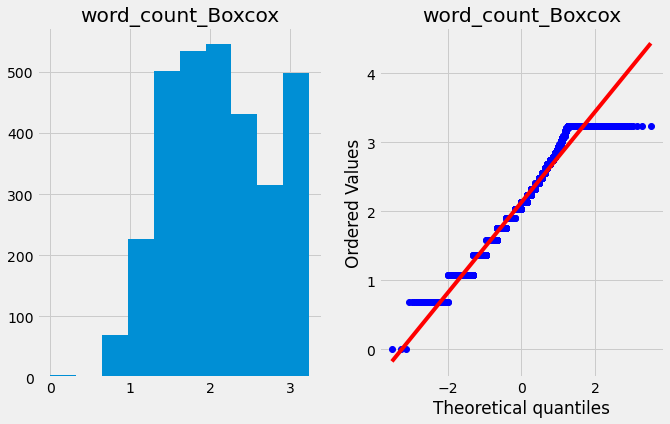

In [95]:
for i in ['word_count']:
    df12[i+'_log']=np.log(df12[i])
    plot_data(df12,i+'_log')
    
    df12[i+'_reciprocal']=1/df12[i]
    plot_data(df12,i+'_reciprocal')
    
    df12[i+'_sqr_root']=df12[i]**(1/2)
    plot_data(df12,i+'_sqr_root')
    
    df12[i+'_sqr']=df12[i]**2
    plot_data(df12,i+'_sqr')
    
    df12[i+'_exponential']=df12[i]**(1/1.2)
    plot_data(df12,i+'_exponential')
    
    df12[i+'_Boxcox'],parameters=stat.boxcox(df12[i])
    plot_data(df12,i+'_Boxcox')

In [96]:
# Boxcox transformation is better for word_count
# we gonna add it to df11

skewness is 0.00404309969194196


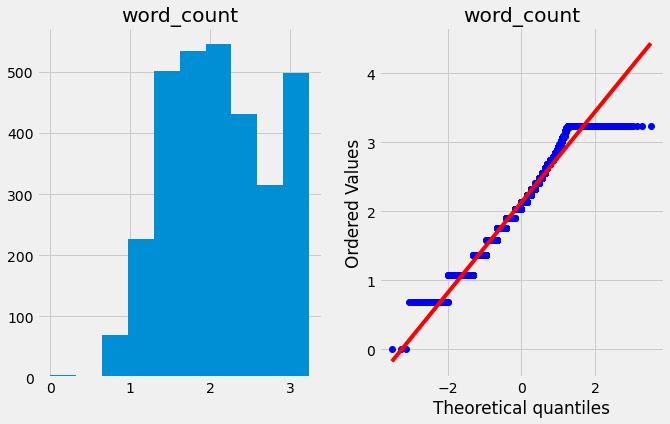

In [97]:
df11['word_count'],parameters=stat.boxcox(df11['word_count'])
plot_data(df11,'word_count')

In [98]:
# 'length_of_comment'
df12 = df11.copy()

skewness is -0.17790705818134495


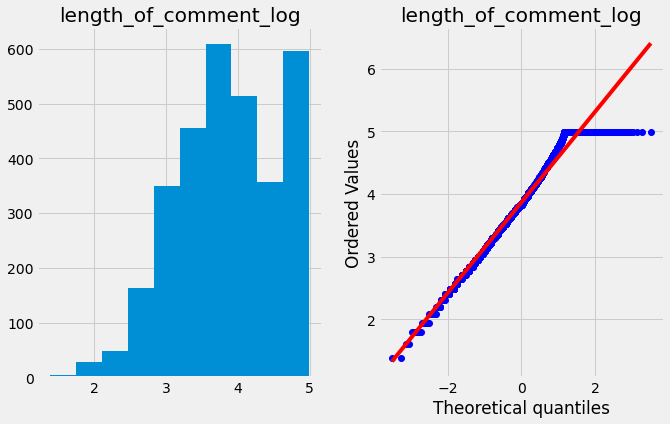

skewness is 2.6764192974019463


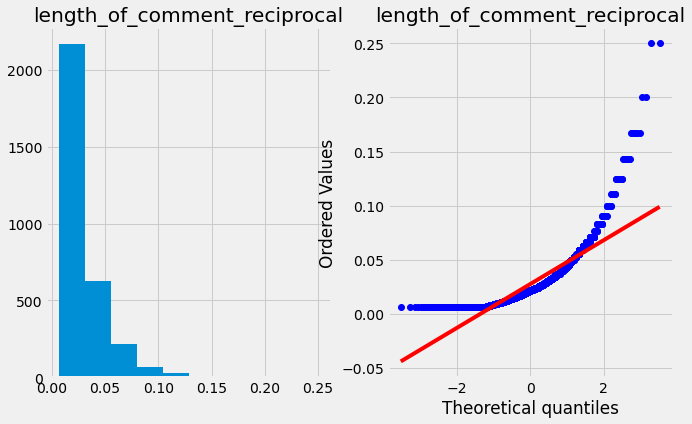

skewness is 0.46408573379631823


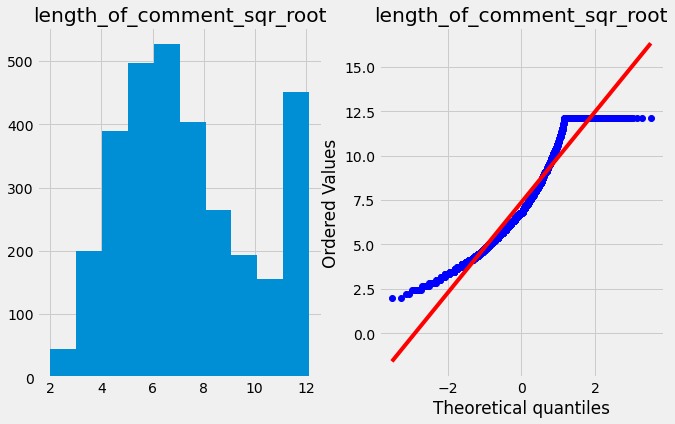

skewness is 1.4546791804005839


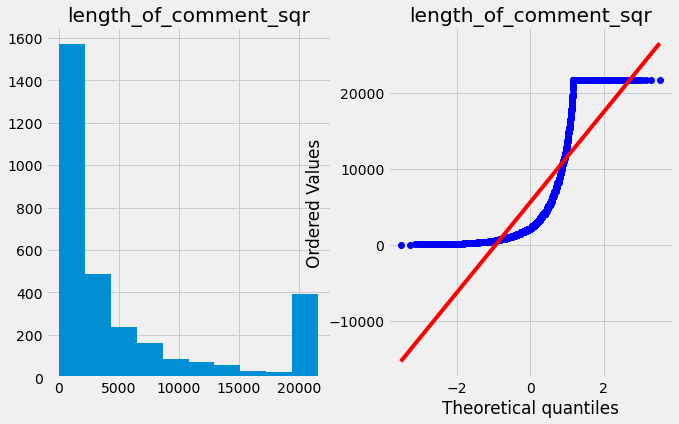

skewness is 0.7804120160272566


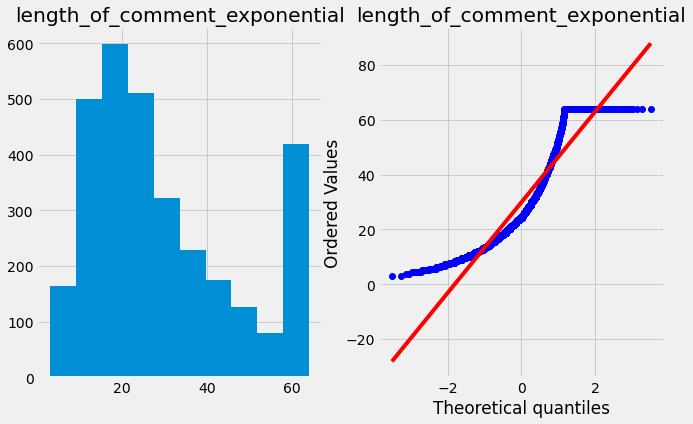

skewness is -0.018524441392859022


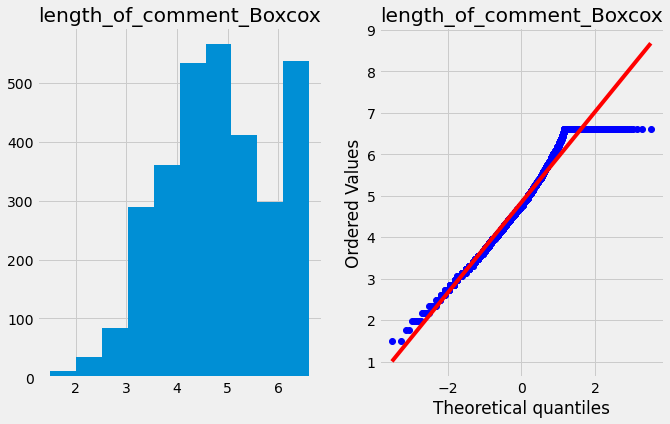

In [99]:
for i in ['length_of_comment']:
    df12[i+'_log']=np.log(df12[i])
    plot_data(df12,i+'_log')
    
    df12[i+'_reciprocal']=1/df12[i]
    plot_data(df12,i+'_reciprocal')
    
    df12[i+'_sqr_root']=df12[i]**(1/2)
    plot_data(df12,i+'_sqr_root')
    
    df12[i+'_sqr']=df12[i]**2
    plot_data(df12,i+'_sqr')
    
    df12[i+'_exponential']=df12[i]**(1/1.2)
    plot_data(df12,i+'_exponential')
    
    df12[i+'_Boxcox'],parameters=stat.boxcox(df12[i])
    plot_data(df12,i+'_Boxcox')

In [100]:
# Boxcox transformation is better for length_of_comment
# we gonna add it to df11

skewness is -0.018524441392859022


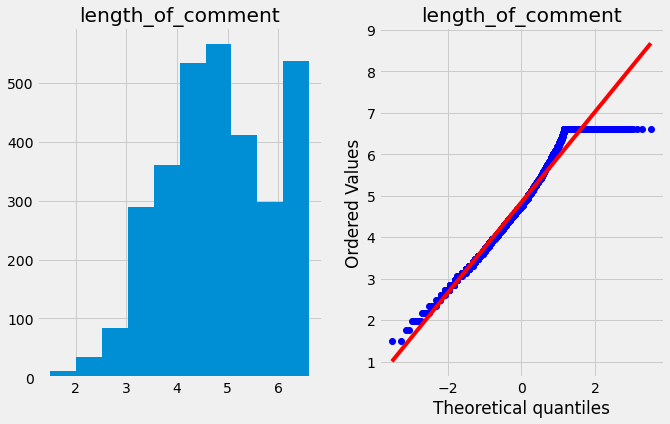

In [101]:
df11['length_of_comment'],parameters=stat.boxcox(df11['length_of_comment'])
plot_data(df11,'length_of_comment')

In [102]:
# 'post_coment_gap'
df12 = df11.copy()

skewness is -0.6000217184111495


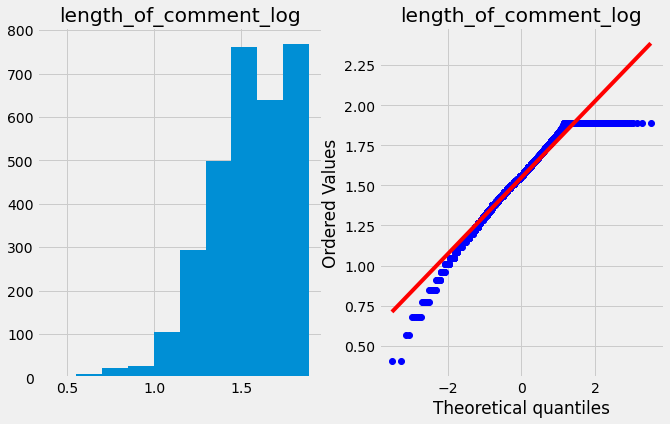

skewness is 1.5616737527770466


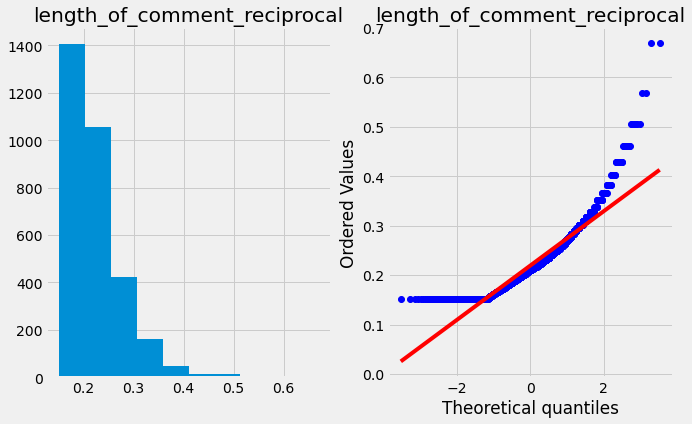

skewness is -0.27936123307291827


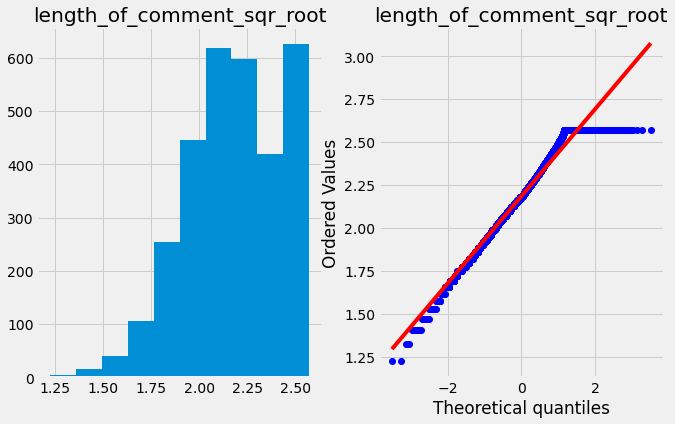

skewness is 0.3872504236035731


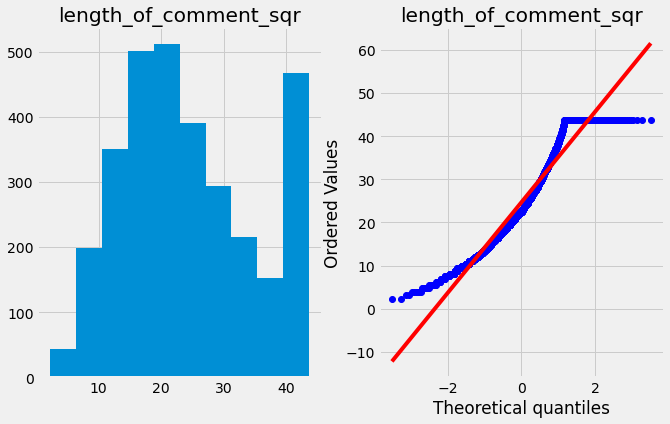

skewness is -0.10009230310954739


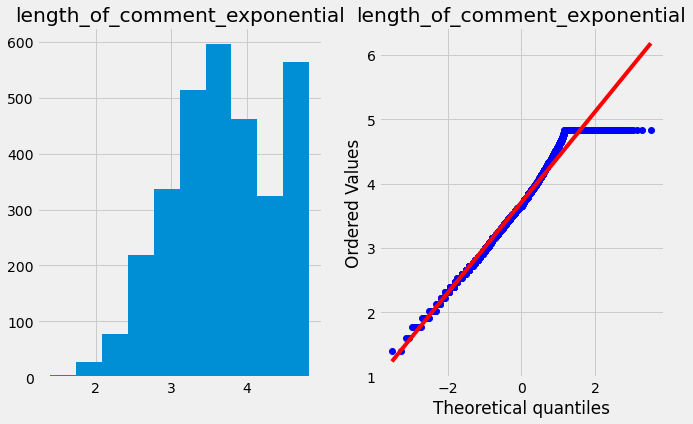

skewness is -0.048468886079677455


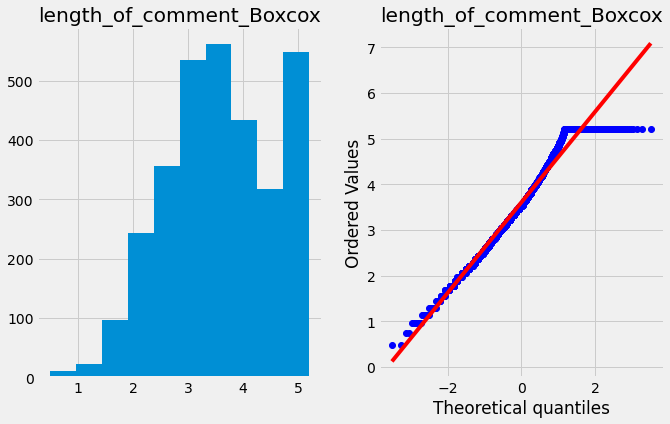

In [103]:
for i in ['length_of_comment']:
    df12[i+'_log']=np.log(df12[i])
    plot_data(df12,i+'_log')
    
    df12[i+'_reciprocal']=1/df12[i]
    plot_data(df12,i+'_reciprocal')
    
    df12[i+'_sqr_root']=df12[i]**(1/2)
    plot_data(df12,i+'_sqr_root')
    
    df12[i+'_sqr']=df12[i]**2
    plot_data(df12,i+'_sqr')
    
    df12[i+'_exponential']=df12[i]**(1/1.2)
    plot_data(df12,i+'_exponential')
    
    df12[i+'_Boxcox'],parameters=stat.boxcox(df12[i])
    plot_data(df12,i+'_Boxcox')

In [104]:
# Boxcox transformation is better for post_coment_gap
# we gonna add it to df11

skewness is -0.07446629619237982


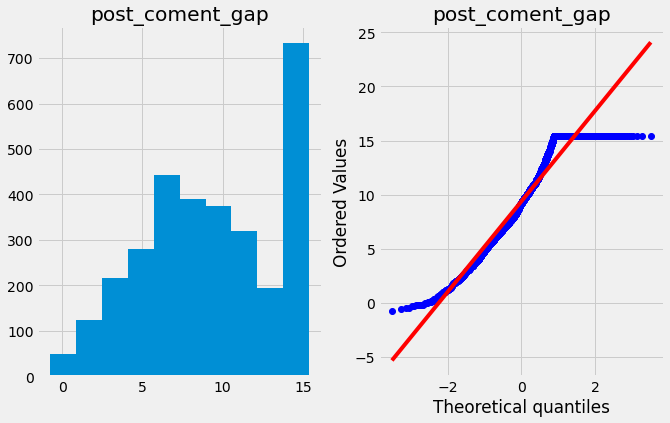

In [105]:
df11['post_coment_gap'],parameters=stat.boxcox(df11['post_coment_gap'])
plot_data(df11,'post_coment_gap')

In [106]:
# features distribution data tranformed to a normal distribution ( not completely but closely)

In [109]:
df11.head()

,com,sim_content,sin_comment,word_count,duplicate_word_ratio,no_of_sentences,length_of_comment,num_of_punctuations,is_period_sequence,stop_word_ratio,post_coment_gap,black_word_count,is_link,is_youtube_link,is_number,is_mail,comment_duplication,classifier_val
0,UgzU68zKFJPwN-m2YG94AaABAg,0.372249,0.280355,3.057751,0.083333,3,6.612096,4.0,0,0.000000,8.750086,1.0,1,0,0,0,0.000000,1
1,Ugw15IDe2iC3lN4ryWJ4AaABAg,0.354255,0.341604,2.410947,0.000000,1,4.897796,1.0,0,0.000000,15.380144,2.0,0,0,0,0,0.715092,0
2,UgxEDtcuNyYVnKxUF4J4AaABAg,0.487752,0.314966,1.578192,0.000000,1,3.791178,0.0,0,0.000000,14.181022,0.0,0,0,0,0,0.000000,0
3,UgyWhzBQg8pzwC6fdeB4AaABAg,0.468095,0.368193,2.328976,0.000000,1,5.041488,0.0,0,0.090909,13.636652,2.0,0,0,0,0,0.000000,0
4,Ugx0I_qzVPcD1XVYMAF4AaABAg,0.366191,0.258061,2.238987,0.000000,1,5.174158,4.0,0,0.000000,13.529500,0.0,1,1,0,0,0.000000,0


In [108]:
df11.columns

Index(['com', 'sim_content', 'sin_comment', 'word_count',
       'duplicate_word_ratio', 'no_of_sentences', 'length_of_comment',
       'num_of_punctuations', 'is_period_sequence', 'stop_word_ratio',
       'post_coment_gap', 'black_word_count', 'is_link', 'is_youtube_link',
       'is_number', 'is_mail', 'comment_duplication', 'classifier_val'],
      dtype='object')

In [110]:
df12 = df11.drop('com',axis=1)

In [111]:
df12.columns

Index(['sim_content', 'sin_comment', 'word_count', 'duplicate_word_ratio',
       'no_of_sentences', 'length_of_comment', 'num_of_punctuations',
       'is_period_sequence', 'stop_word_ratio', 'post_coment_gap',
       'black_word_count', 'is_link', 'is_youtube_link', 'is_number',
       'is_mail', 'comment_duplication', 'classifier_val'],
      dtype='object')

In [112]:
df12.to_csv('model.csv')